[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/idealo/image-super-resolution/blob/master/notebooks/ISR_Prediction_Tutorial.ipynb)

# Install ISR
(skip if using local repo)

In [ ]:
!pip install ISR -y

# Predict

Download a sample image

In [ ]:
!wget http://images.math.cnrs.fr/IMG/png/section8-image.png
!mkdir -p data/input/test_images
!mv *.png data/input/test_images

Load the image with PIL

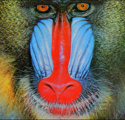

In [4]:

import numpy as np
from PIL import Image

img = Image.open('data/input/sample/baboon.png')
img

## Get predictions

### Create the model and run prediction
Create a RRDN or RDN model with the provided pre-trained weights, choose one

In [3]:
%cd image-super-resolution-Alapan18-\

c:\Users\alapa\image upscaler\image-super-resolution-Alapan18-


In [8]:
# Uncomment if using local repo
# import sys
# sys.path.append('..')
from ISR.models import RDN, RRDN

#model = RDN(weights='noise-cancel')
#model = RRDN(weights='gans')
model = RDN(weights='psnr-small')
#model = RDN(weights='psnr-large')

10694096/10694096 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


#### Alternatively, load your own weights
To load your own weights first build the model specifying the architecture parameters and then load the weights like with any Keras model.

In [ ]:
rdn = RRDN(arch_params={'C': 4, 'D':3, 'G':32, 'G0':32, 'T':10, 'x':4})
rdn.model.load_weights('weights/sample_weights/rrdn-C4-D3-G32-G032-T10-x4/Perceptual/rrdn-C4-D3-G32-G032-T10-x4_epoch299.hdf5')

#### Baseline

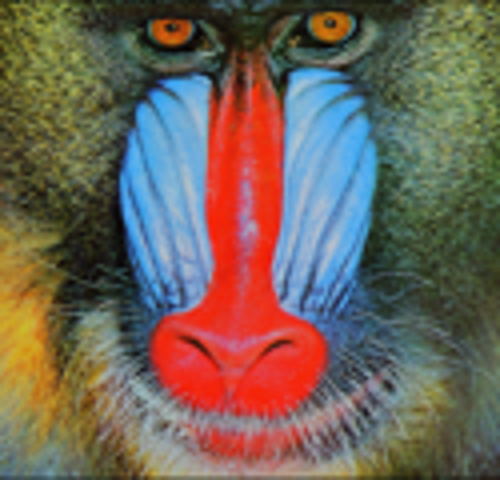

In [9]:
img.resize(size=(img.size[0]*4, img.size[1]*4), resample=Image.BICUBIC)

#### Prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


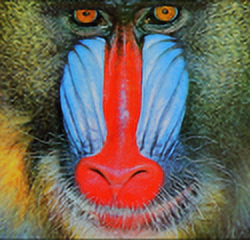

In [10]:
sr_img = model.predict(np.array(img))
Image.fromarray(sr_img)

### Usecase: upscaling noisy images

Compress the image into the jpeg format to introduce compression artefact and lose some information.

In [ ]:
img.save('data/input/test_images/compressed.jpeg','JPEG', dpi=[300, 300], quality=50)
compressed_img = Image.open('data/input/test_images/compressed.jpeg')

compressed_img

#### Baseline

In [ ]:
compressed_img.resize(size=(compressed_img.size[0]*2, compressed_img.size[1]*2), resample=Image.BICUBIC)

In [ ]:
model = RDN(weights='noise-cancel')
sr_img = model.predict(np.array(compressed_img))
Image.fromarray(sr_img)

### Predictor Class
You can also use the predictor class to run the model on entire folders:

In [ ]:
from ISR.predict import Predictor
!mkdir -p data/output
predictor = Predictor(input_dir='data/input/test_images/')
predictor.get_predictions(model=rdn, weights_path='weights/rdn-C6-D20-G64-G064-x2_ArtefactCancelling_epoch219.hdf5')